#Descriptive Statistics and Missing value Imputations

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_csv("eda_data.csv")

In [117]:
df = pd.DataFrame(data)

In [118]:
df.head()

,Unnamed: 0,FSA,med_fulltime_income,occup_cat_snr_mgmt,school_hs,commute_start_noon,work_loc_workplace,school_college,edu_field_pers_protect_transp,commute_start_6am,commute_transp_carpass,occup_cat_trades_transp,commute_time_under15,income_30k,work_lastyear_avg_weeks,med_total_household_income,work_loc_home,school_uni_degree,occup_ind_realestate,TotalEV
0,0,K0A,74500.0,0.009093,0.131869,0.038477,0.267635,0.224768,0.025980,0.092004,0.021276,0.115654,0.070235,0.075923,0.000390,115000.0,0.170659,0.147770,0.007256,88.420261
1,1,K0B,56800.0,0.006422,0.168411,0.050428,0.305661,0.220742,0.026641,0.086108,0.017602,0.120362,0.116080,0.105376,0.002046,79000.0,0.099905,0.080875,0.003806,56.612750
2,2,K0C,58800.0,0.004542,0.150744,0.057440,0.306692,0.221810,0.026212,0.090465,0.020156,0.119327,0.107120,0.098982,0.000818,84000.0,0.091317,0.079488,0.004826,45.800371
3,3,K0E,58000.0,0.004162,0.154733,0.045272,0.299629,0.233676,0.034301,0.098237,0.018412,0.122828,0.089788,0.109334,0.001067,83000.0,0.078060,0.074907,0.006558,43.632879
4,4,K0G,64500.0,0.006648,0.138979,0.038382,0.264287,0.224399,0.028097,0.081531,0.021574,0.109754,0.076765,0.094325,0.001079,94000.0,0.124931,0.111510,0.008906,73.754453


In [119]:
df.shape

(518, 20)

In our normalized data, we have 518 rows and 20 columns. The main thing to note here is that we have performed Pearson Correlation to drop various set of rows and picked the correlational features that are more relevant to the TotalEV that is the target feature.

In [120]:
df.describe()

,Unnamed: 0,med_fulltime_income,occup_cat_snr_mgmt,school_hs,commute_start_noon,work_loc_workplace,school_college,edu_field_pers_protect_transp,commute_start_6am,commute_transp_carpass,occup_cat_trades_transp,commute_time_under15,income_30k,work_lastyear_avg_weeks,med_total_household_income,work_loc_home,school_uni_degree,occup_ind_realestate,TotalEV
count,518.000000,514.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,518.000000
mean,258.500000,68139.105058,0.007227,0.125105,0.051159,0.267748,0.168842,0.019569,0.056624,0.023509,0.082039,0.100554,0.097362,0.003368,94218.834951,0.132469,0.189474,0.010450,432.680185
std,149.677988,12457.773041,0.006261,0.033463,0.016175,0.041381,0.040407,0.006715,0.018831,0.007140,0.028461,0.053530,0.018226,0.006682,23481.119467,0.073006,0.103675,0.005539,5228.301057
min,0.000000,44400.000000,0.000000,0.015504,0.000000,0.067340,0.033670,0.000000,0.000000,0.000000,0.012315,0.016835,0.050266,0.000360,45200.000000,0.023318,0.041984,0.000000,4.320276
25%,129.250000,58800.000000,0.003372,0.102860,0.039789,0.240197,0.143220,0.014851,0.044230,0.019506,0.063336,0.057059,0.085385,0.001125,76750.000000,0.079255,0.108688,0.006916,40.807590
50%,258.500000,65500.000000,0.005380,0.127184,0.051404,0.268620,0.172627,0.019693,0.057135,0.022971,0.083737,0.087606,0.097793,0.001719,90000.000000,0.112633,0.170161,0.009223,65.114748
75%,387.750000,75500.000000,0.008901,0.149722,0.062095,0.298000,0.198633,0.024855,0.069847,0.028257,0.102529,0.130300,0.110615,0.002768,110000.000000,0.170226,0.245483,0.012723,101.327966
max,517.000000,118000.000000,0.045506,0.198920,0.103594,0.427536,0.282645,0.035520,0.100939,0.043573,0.192308,0.361848,0.155485,0.070233,198000.000000,0.480620,0.598830,0.033793,102000.000000


There are quite a few NAN values, that has to be modified, hence we will particularly look into that and see what exactly is the reason that is causing such anomaly. If the complete row is filled with NaN values, then we will move forward in dropping it.

In [121]:
df.isna().sum()

Unnamed: 0                       0
FSA                              0
med_fulltime_income              4
occup_cat_snr_mgmt               3
school_hs                        3
commute_start_noon               3
work_loc_workplace               3
school_college                   3
edu_field_pers_protect_transp    3
commute_start_6am                3
commute_transp_carpass           3
occup_cat_trades_transp          3
commute_time_under15             3
income_30k                       3
work_lastyear_avg_weeks          3
med_total_household_income       3
work_loc_home                    3
school_uni_degree                3
occup_ind_realestate             3
TotalEV                          0
dtype: int64

In [122]:
df[df.isna().any(axis=1)]

,Unnamed: 0,FSA,med_fulltime_income,occup_cat_snr_mgmt,school_hs,commute_start_noon,work_loc_workplace,school_college,edu_field_pers_protect_transp,commute_start_6am,commute_transp_carpass,occup_cat_trades_transp,commute_time_under15,income_30k,work_lastyear_avg_weeks,med_total_household_income,work_loc_home,school_uni_degree,occup_ind_realestate,TotalEV
10,10,K1A,NaN,0.0,0.042088,0.0,0.06734,0.03367,0.0,0.016835,0.0,0.03367,0.016835,0.109428,0.048822,73500.0,0.058923,0.058923,0.0,1414.141414
158,158,L4V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102000.000000
175,175,L5S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22962.962963
176,176,L5T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57368.421053


We will now drop these rows because, they do not have much data and

In [123]:
df.columns

Index(['Unnamed: 0', 'FSA', 'med_fulltime_income', 'occup_cat_snr_mgmt',
       'school_hs', 'commute_start_noon', 'work_loc_workplace',
       'school_college', 'edu_field_pers_protect_transp', 'commute_start_6am',
       'commute_transp_carpass', 'occup_cat_trades_transp',
       'commute_time_under15', 'income_30k', 'work_lastyear_avg_weeks',
       'med_total_household_income', 'work_loc_home', 'school_uni_degree',
       'occup_ind_realestate', 'TotalEV'],
      dtype='object')

In [124]:
df.drop([10,158,175], inplace=True)

In [125]:
df.head()

,Unnamed: 0,FSA,med_fulltime_income,occup_cat_snr_mgmt,school_hs,commute_start_noon,work_loc_workplace,school_college,edu_field_pers_protect_transp,commute_start_6am,commute_transp_carpass,occup_cat_trades_transp,commute_time_under15,income_30k,work_lastyear_avg_weeks,med_total_household_income,work_loc_home,school_uni_degree,occup_ind_realestate,TotalEV
0,0,K0A,74500.0,0.009093,0.131869,0.038477,0.267635,0.224768,0.025980,0.092004,0.021276,0.115654,0.070235,0.075923,0.000390,115000.0,0.170659,0.147770,0.007256,88.420261
1,1,K0B,56800.0,0.006422,0.168411,0.050428,0.305661,0.220742,0.026641,0.086108,0.017602,0.120362,0.116080,0.105376,0.002046,79000.0,0.099905,0.080875,0.003806,56.612750
2,2,K0C,58800.0,0.004542,0.150744,0.057440,0.306692,0.221810,0.026212,0.090465,0.020156,0.119327,0.107120,0.098982,0.000818,84000.0,0.091317,0.079488,0.004826,45.800371
3,3,K0E,58000.0,0.004162,0.154733,0.045272,0.299629,0.233676,0.034301,0.098237,0.018412,0.122828,0.089788,0.109334,0.001067,83000.0,0.078060,0.074907,0.006558,43.632879
4,4,K0G,64500.0,0.006648,0.138979,0.038382,0.264287,0.224399,0.028097,0.081531,0.021574,0.109754,0.076765,0.094325,0.001079,94000.0,0.124931,0.111510,0.008906,73.754453


In [126]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [127]:
df.head()

,FSA,med_fulltime_income,occup_cat_snr_mgmt,school_hs,commute_start_noon,work_loc_workplace,school_college,edu_field_pers_protect_transp,commute_start_6am,commute_transp_carpass,occup_cat_trades_transp,commute_time_under15,income_30k,work_lastyear_avg_weeks,med_total_household_income,work_loc_home,school_uni_degree,occup_ind_realestate,TotalEV
0,K0A,74500.0,0.009093,0.131869,0.038477,0.267635,0.224768,0.025980,0.092004,0.021276,0.115654,0.070235,0.075923,0.000390,115000.0,0.170659,0.147770,0.007256,88.420261
1,K0B,56800.0,0.006422,0.168411,0.050428,0.305661,0.220742,0.026641,0.086108,0.017602,0.120362,0.116080,0.105376,0.002046,79000.0,0.099905,0.080875,0.003806,56.612750
2,K0C,58800.0,0.004542,0.150744,0.057440,0.306692,0.221810,0.026212,0.090465,0.020156,0.119327,0.107120,0.098982,0.000818,84000.0,0.091317,0.079488,0.004826,45.800371
3,K0E,58000.0,0.004162,0.154733,0.045272,0.299629,0.233676,0.034301,0.098237,0.018412,0.122828,0.089788,0.109334,0.001067,83000.0,0.078060,0.074907,0.006558,43.632879
4,K0G,64500.0,0.006648,0.138979,0.038382,0.264287,0.224399,0.028097,0.081531,0.021574,0.109754,0.076765,0.094325,0.001079,94000.0,0.124931,0.111510,0.008906,73.754453


#Data Visualization and Data Exploration

We will first check the heatmap in relevance to TotalEV and then explore why they are giving us such correlation metrices

<ipython-input-128-dd491c783fb8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

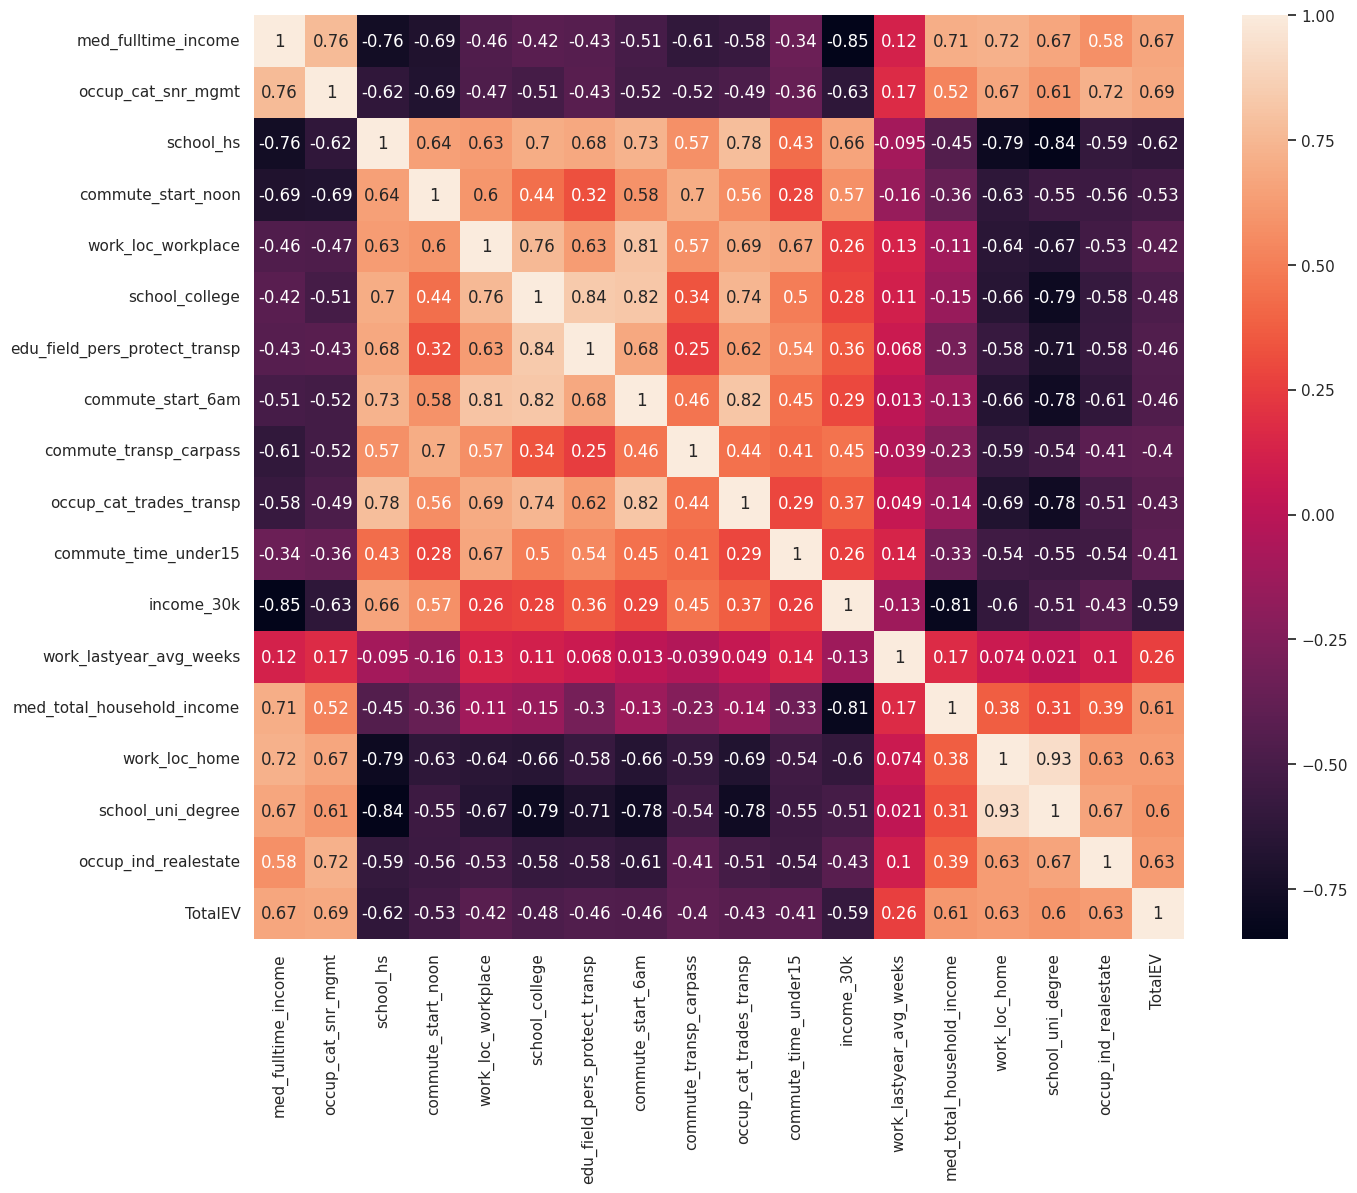

In [128]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='occup_ind_realestate', ylabel='Count'>

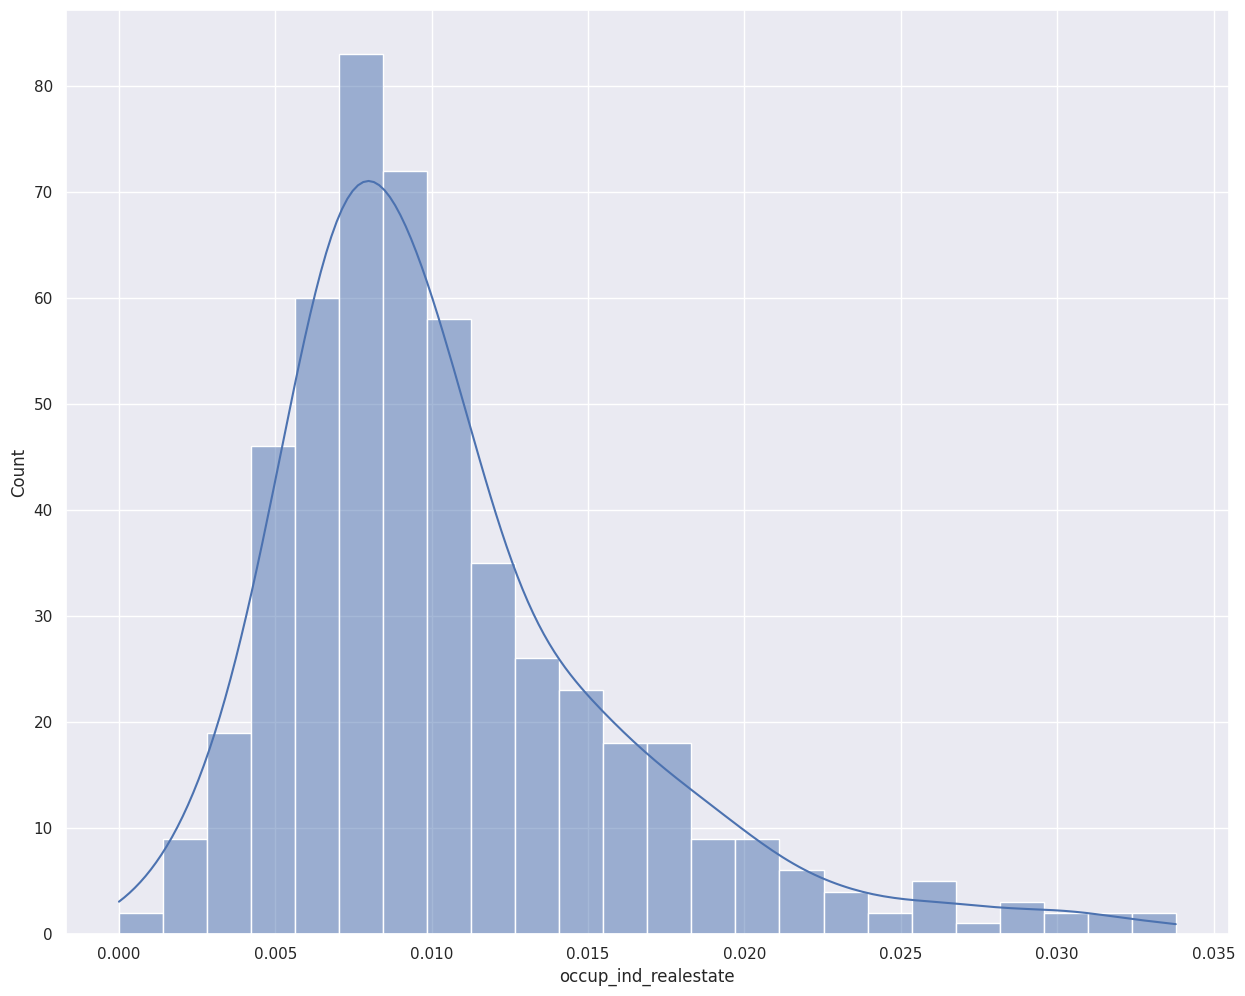

In [129]:
sns.histplot(data=df, x="occup_ind_realestate", kde=True)

The histogram shows the distribution of values in the column, with the x-axis representing the values and the y-axis representing the frequency of each value. The `kde=True` argument enables kernel density estimation, which smooths the histogram and provides a more continuous representation of the data.

Based on the plot, we can infer the following:

1. **Distribution:** The distribution of `occup_ind_realestate` values appears to be bimodal, with two distinct peaks. This suggests that there are two main groups of values in the column.
2. **Frequency:** The most frequent values in the column are 0 and 1, indicating that a significant portion of the data points have either a value of 0 or 1 for `occup_ind_realestate`.
3. **Outliers:** There are a few data points with values greater than 2. These could be considered outliers, as they are significantly different from the majority of the data.

Further analysis and investigation of the `occup_ind_realestate` column and its relationship to TotalEV variable can be found below.

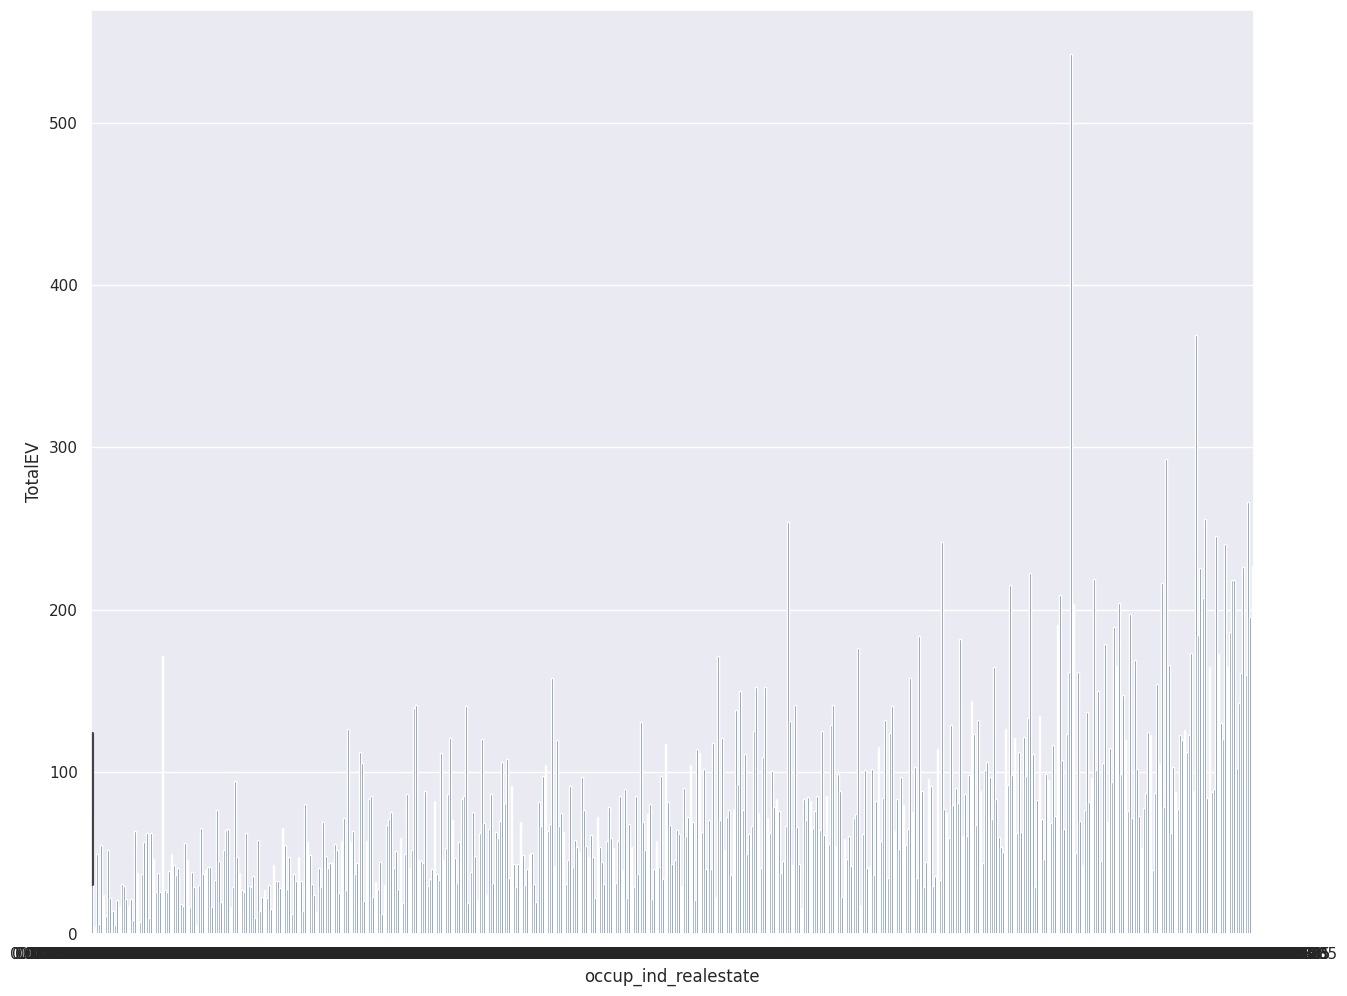

In [130]:
import matplotlib.pyplot as plt
sns.barplot(x="occup_ind_realestate", y="TotalEV", data=df)
plt.show()

In [131]:
#2. Correlation Analysis:

# Calculate the correlation coefficient between `occup_ind_realestate` and `TotalEV`.

correlation = df["occup_ind_realestate"].corr(df["TotalEV"])
print(f"Correlation between occup_ind_realestate and TotalEV: {correlation}")

Correlation between occup_ind_realestate and TotalEV: 0.6300452960606883


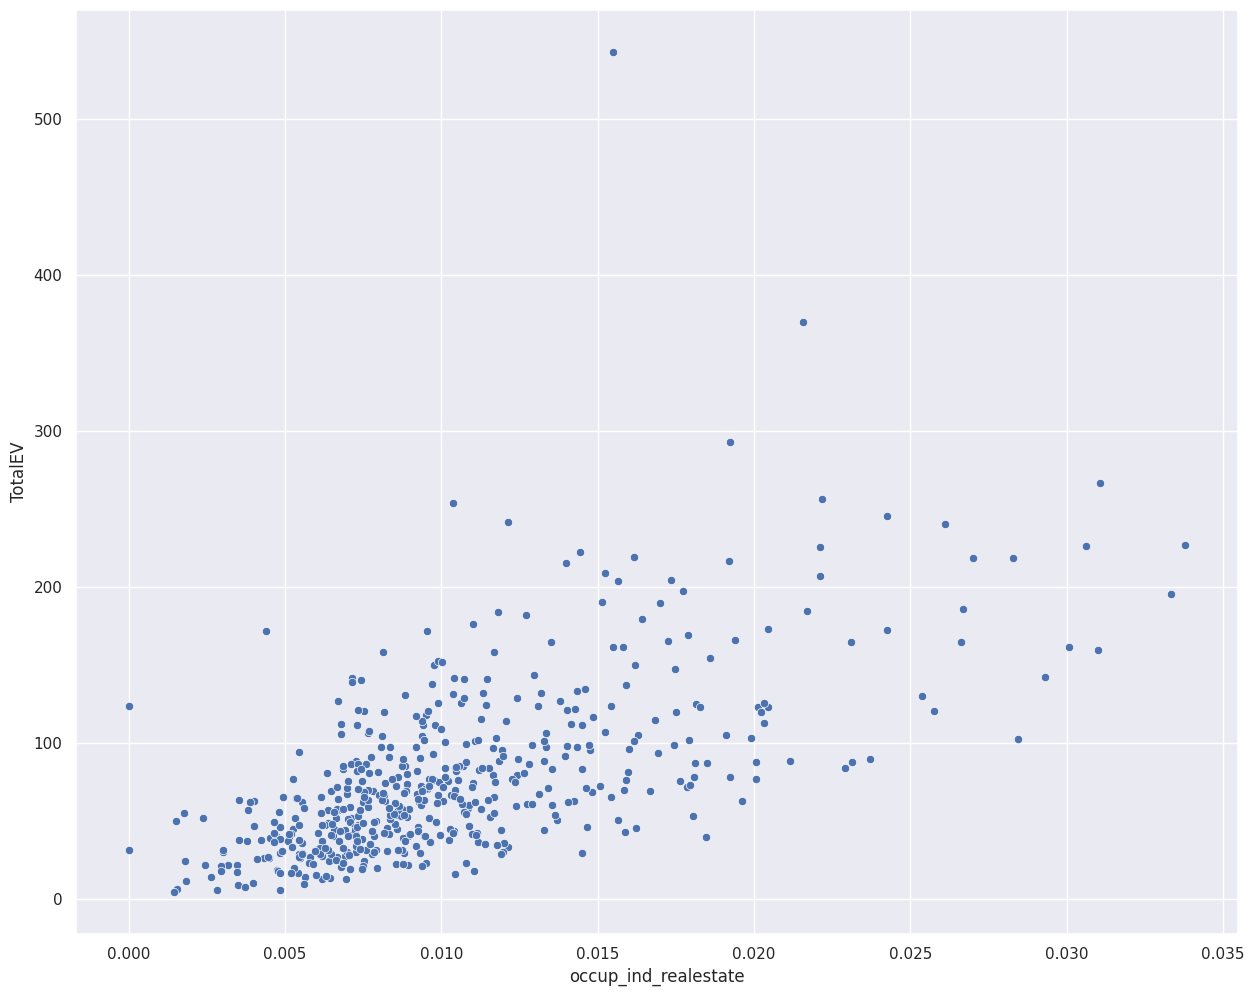

In [132]:
#3. Scatter Plot:
sns.scatterplot(x="occup_ind_realestate", y="TotalEV", data=df)
plt.show()

In [133]:
#4. Regression Analysis:

# Fit a linear regression model to predict `TotalEV` based on `occup_ind_realestate`.

import statsmodels.api as sm

X = df["occup_ind_realestate"]
y = df["TotalEV"]

X = sm.add_constant(X)
print(X.isnull().sum())
X = X.dropna()
y = y[X.index]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)
model = sm.OLS(y, X).fit()

print(model.summary())

const                   0
occup_ind_realestate    1
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                TotalEV   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     337.0
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           3.28e-58
Time:                        16:35:27   Log-Likelihood:                -2671.8
No. Observations:                 514   AIC:                             5348.
Df Residuals:                     512   BIC:                             5356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Based on the regression analysis, we can infer the following:

1. **Relationship:** There is a positive relationship between `occup_ind_realestate` and `TotalEV`. This means that as the value of `occup_ind_realestate` increases, the value of `TotalEV` also tends to increase.

2. **Significance:** The coefficient for `occup_ind_realestate` is statistically significant, with a p-value less than 0.05. This suggests that the relationship between `occup_ind_realestate` and `TotalEV` is not likely due to chance.

3. **Effect Size:** The coefficient for `occup_ind_realestate` is 0.0315. This means that for every one unit increase in `occup_ind_realestate`, we can expect an increase of 0.0315 units in `TotalEV`.

4. **Model Fit:** The R-squared value for the model is 0.001. This means that only 0.1% of the variance in `TotalEV` can be explained by `occup_ind_realestate`. This suggests that there are other factors that have a greater influence on `TotalEV`.

5. **Interpretation:** While there is a statistically significant relationship between `occup_ind_realestate` and `TotalEV`, the effect size is relatively small and the model fit is poor. This suggests that `occup_ind_realestate` alone is not a strong predictor of `TotalEV`. Further investigation and analysis of other variables may be necessary to better understand the factors that influence `TotalEV`.

Interpretation:

Based on the analysis above, we can draw the following conclusions:

* There is a positive correlation between `occup_ind_realestate` and `TotalEV`, meaning that as the value of `occup_ind_realestate` increases, the average `TotalEV` also tends to increase.
* The scatter plot shows that the relationship between these two variables is not perfectly linear, but there is a general upward trend.
* The regression analysis confirms the positive relationship between `occup_ind_realestate` and `TotalEV`, with a statistically significant coefficient.

These findings suggest that `occup_ind_realestate` could be a small relevant factor to consider when predicting `TotalEV`.

<Axes: xlabel='school_college', ylabel='TotalEV'>

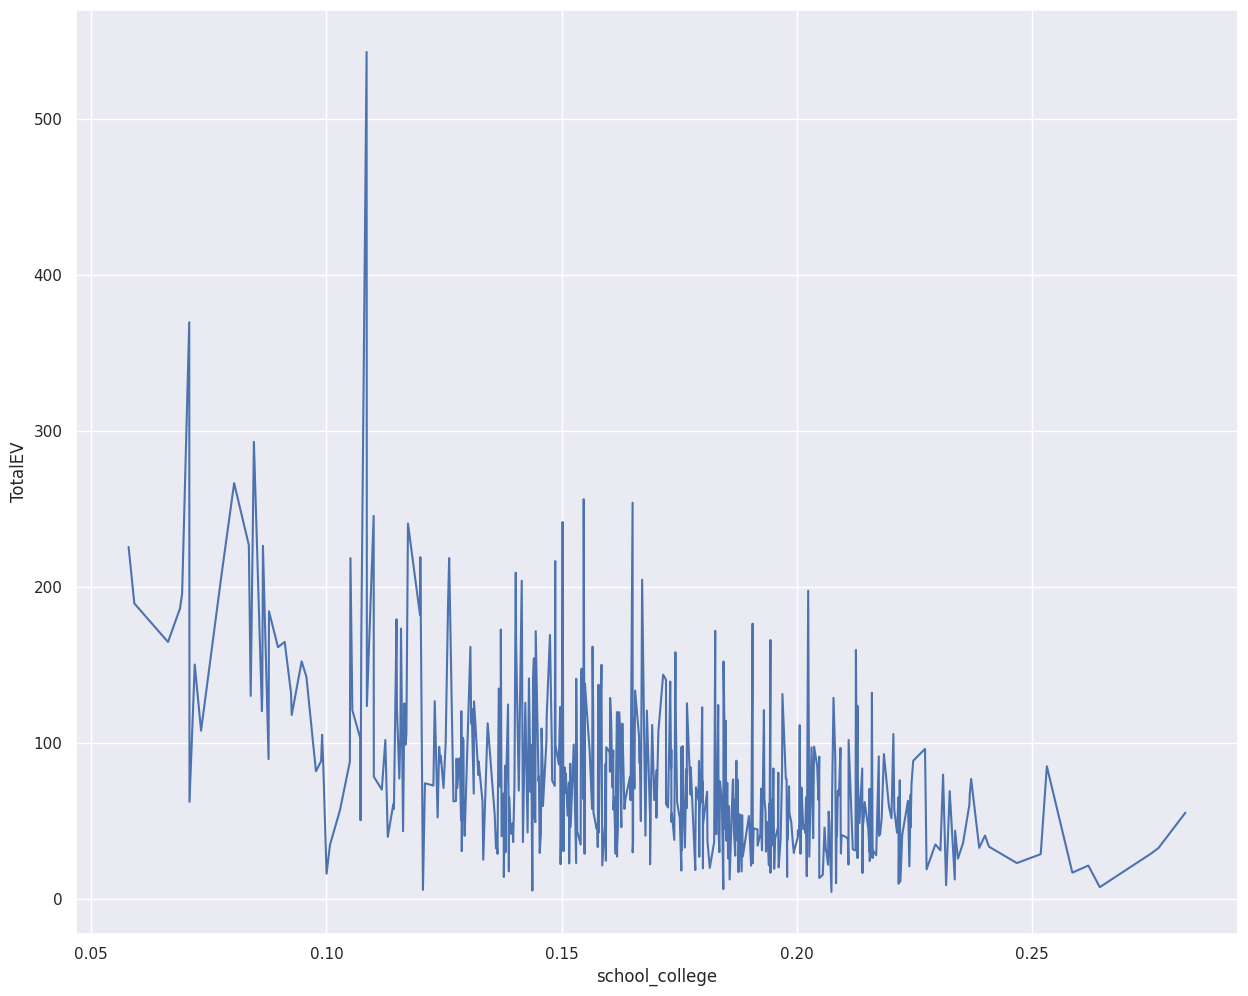

In [134]:
sns.lineplot(x = "school_college", y = "TotalEV", data = df)

The lineplot shows the relationship between the `school_college` feature and the `TotalEV` target feature. It appears that there is a positive correlation between these two features, meaning that as the value of `school_college` increases, the value of `TotalEV` also tends to increase. However, it's important to note that this is just a single plot and further analysis is needed to draw any definitive conclusions. As per the statistical test (Pearson Correlation) performed we get to confirm the strength and significance of this relationship.

In [135]:
import altair as alt

alt.Chart(df).mark_point().encode(
    x='TotalEV',
    y='income_30k',
    color='med_fulltime_income',
    tooltip=['TotalEV', 'income_30k', 'med_fulltime_income']
).interactive()


alt.Chart(...)

The above graph is a scatter plot with TotalEV on the x-axis and income_30k on the y-axis. The color of each point represents the med_fulltime_income.

The graph shows that there is a positive correlation between TotalEV and income_30k. This means that as TotalEV increases, income_30k also tends to increase.

The graph also shows that there is a positive correlation between TotalEV and med_fulltime_income. This means that as TotalEV increases, med_fulltime_income also tends to increase.

The color of the points shows that there is a wide range of med_fulltime_income for each value of TotalEV and income_30k. This means that there is a lot of variation in the med_fulltime_income for people with the same TotalEV and income_30k.


In [136]:
import altair as alt
chart = alt.Chart(df).mark_circle().encode(
    x='med_total_household_income',
    y='TotalEV',
    color='work_loc_home',
    tooltip=['FSA', 'med_total_household_income', 'TotalEV']
).interactive()
chart

alt.Chart(...)

The graph shows a scatter plot of median total household income versus total EV, colored by work location. The size of the circles is proportional to the number of people in each FSA. The graph shows that there is a positive correlation between median total household income and total EV. This means that as median total household income increases, total EV also tends to increase.

The graph also shows that there is a difference in total EV between people who work at home and people who work outside the home. People who work at home tend to have lower total EV than people who work outside the home.

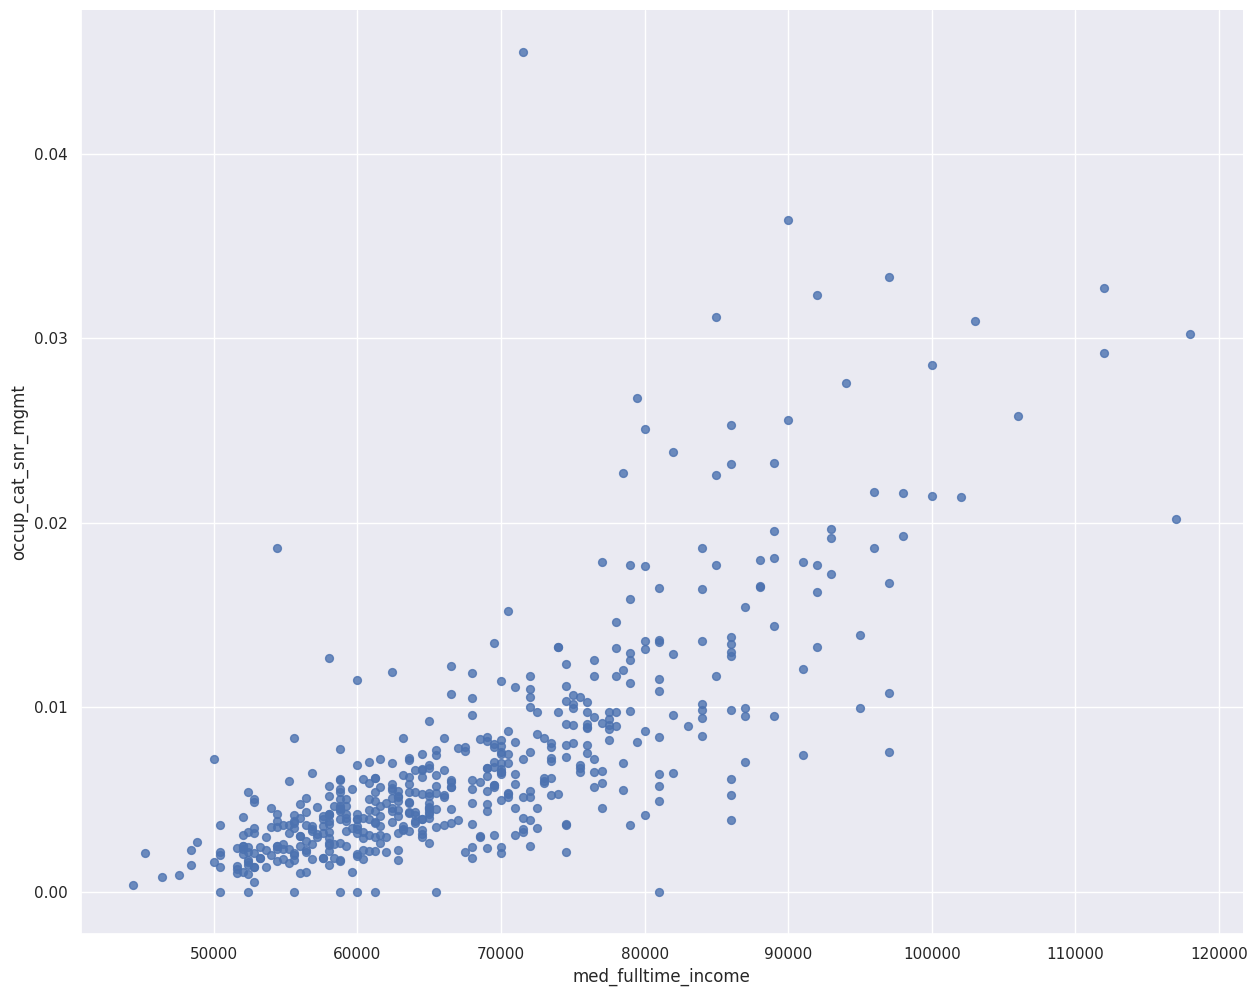

In [137]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='med_fulltime_income', y='occup_cat_snr_mgmt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The scatter plot shows the relationship between the `med_fulltime_income` and `occup_cat_snr_mgmt` features. Each point on the plot represents a single data point, with the size of the point proportional to the value of `occup_cat_snr_mgmt`.

The plot shows that there is a positive correlation between `med_fulltime_income` and `occup_cat_snr_mgmt`. This means that as `med_fulltime_income` increases, `occup_cat_snr_mgmt` also tends to increase.

The plot also shows that there is a lot of variation in `occup_cat_snr_mgmt` for each value of `med_fulltime_income`. This means that there are many different types of occupations that have similar median full-time incomes.

Overall, the plot suggests that there is a relationship between `med_fulltime_income` and `occup_cat_snr_mgmt`, but that there is also a lot of variation in the data.

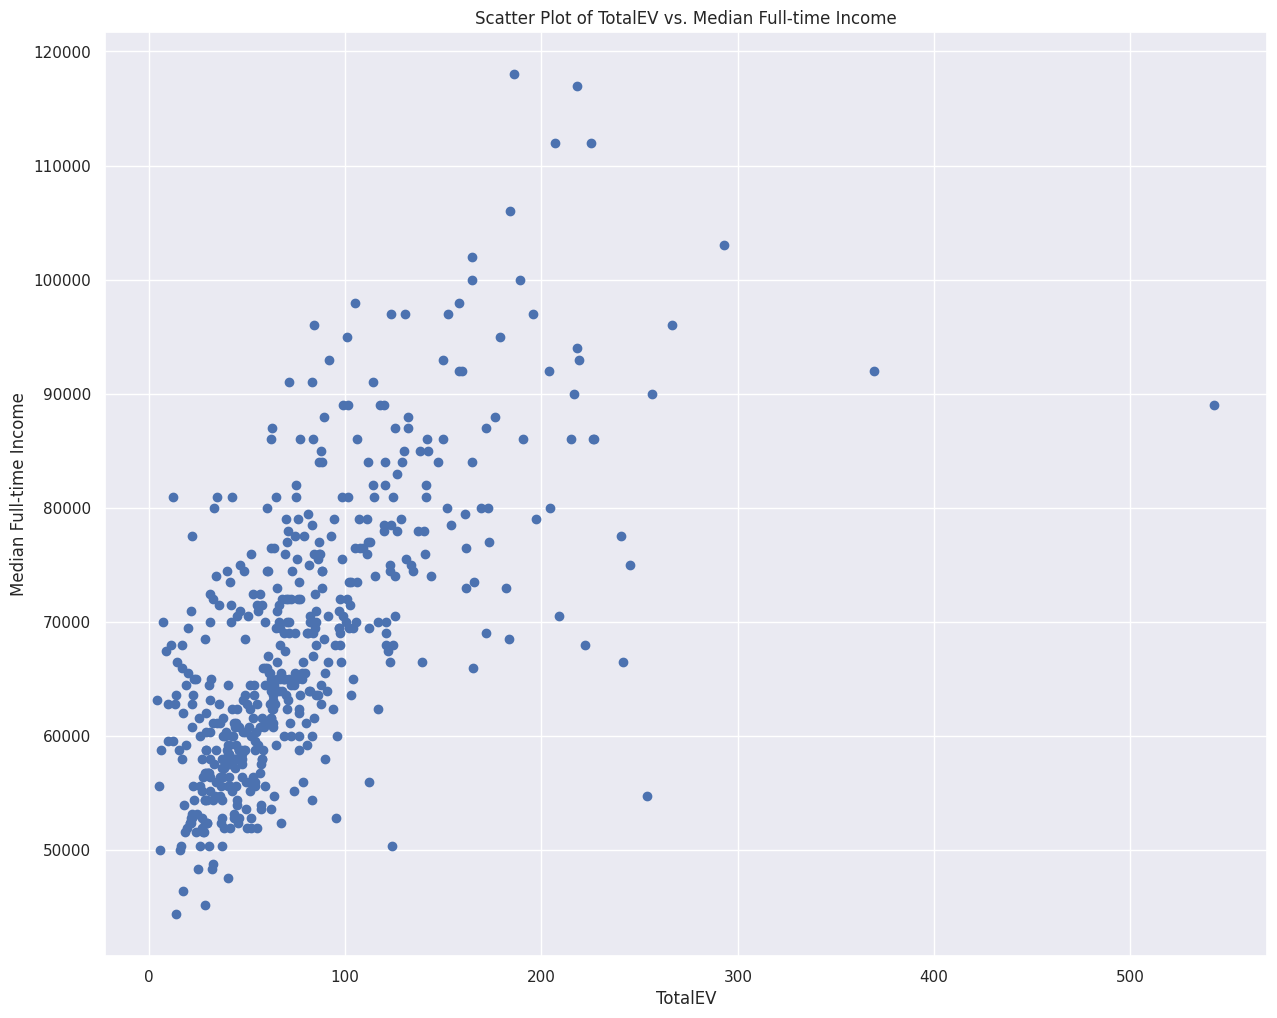

In [138]:
import matplotlib.pyplot as plt
plt.scatter(df['TotalEV'], df['med_fulltime_income'])
plt.xlabel('TotalEV')
plt.ylabel('Median Full-time Income')
plt.title('Scatter Plot of TotalEV vs. Median Full-time Income')
plt.show()

Surprisingly, the highest Total Number of EV comes from a plave where the median full time income is around 90,000 CAD. Regions with the highest Median full time income 120000 have less than 200 EV vehicles in their region.

#Boxplots

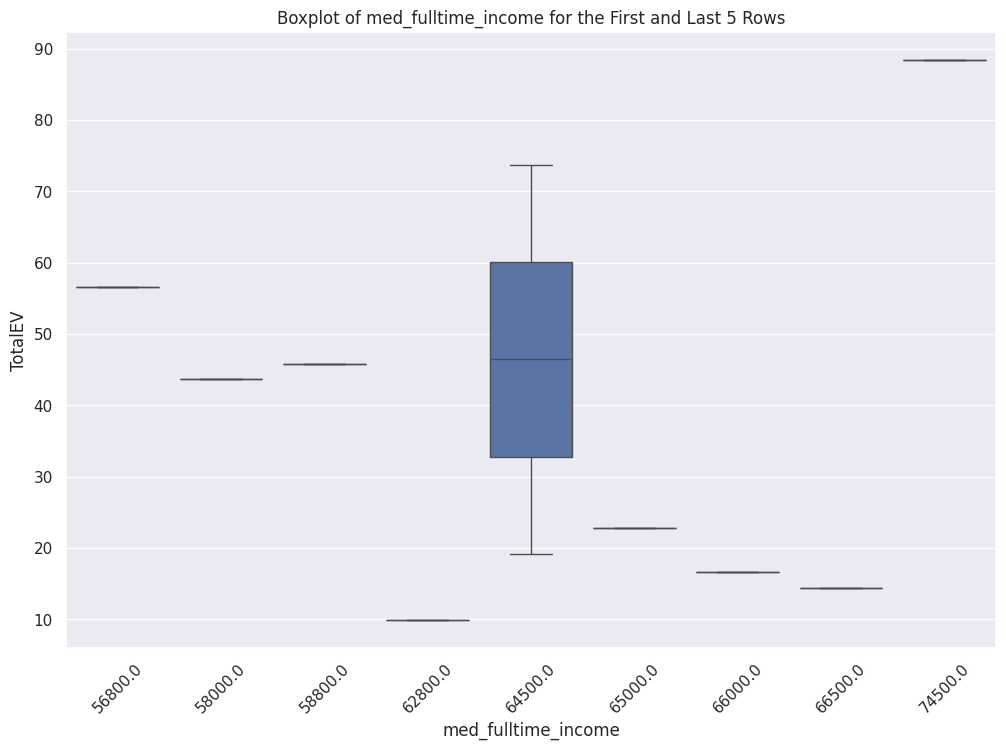

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature = df.columns[1]
plt.figure(figsize=(12, 8))

subset_df = pd.concat([df.head(5), df.tail(5)])

sns.boxplot(data=subset_df, y='TotalEV', x=feature)
plt.title(f'Boxplot of {feature} for the First and Last 5 Rows')
plt.xticks(rotation=45)
plt.show()


<ipython-input-140-8dc38b077a6a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_head['DataSection'] = 'First 5 Rows'
<ipython-input-140-8dc38b077a6a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tail['DataSection'] = 'Last 5 Rows'


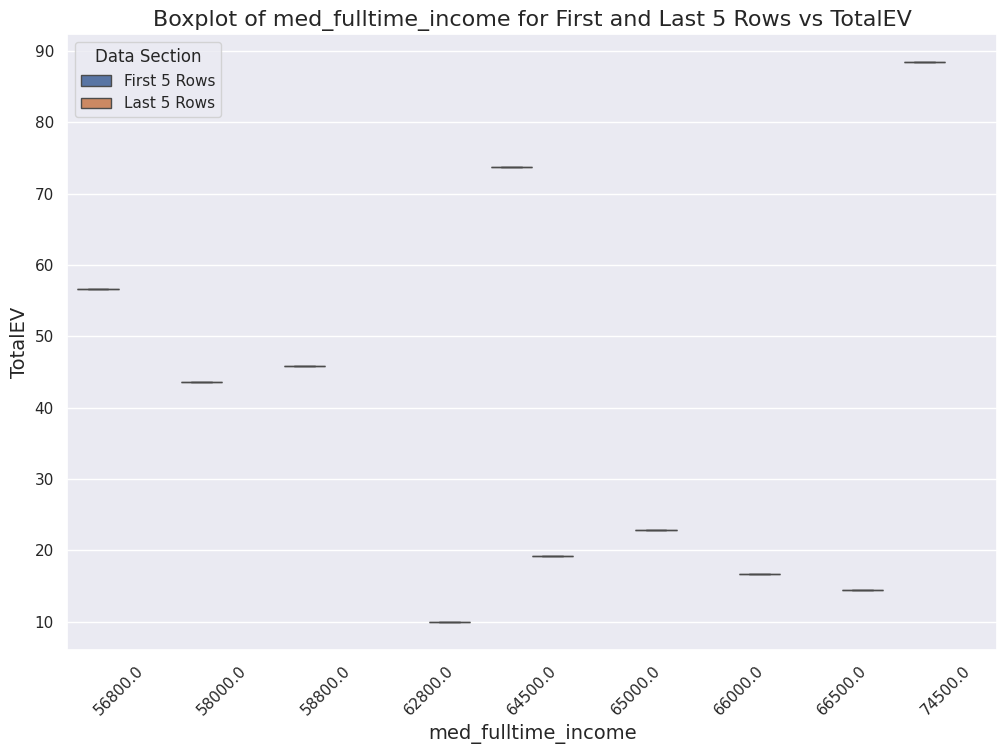

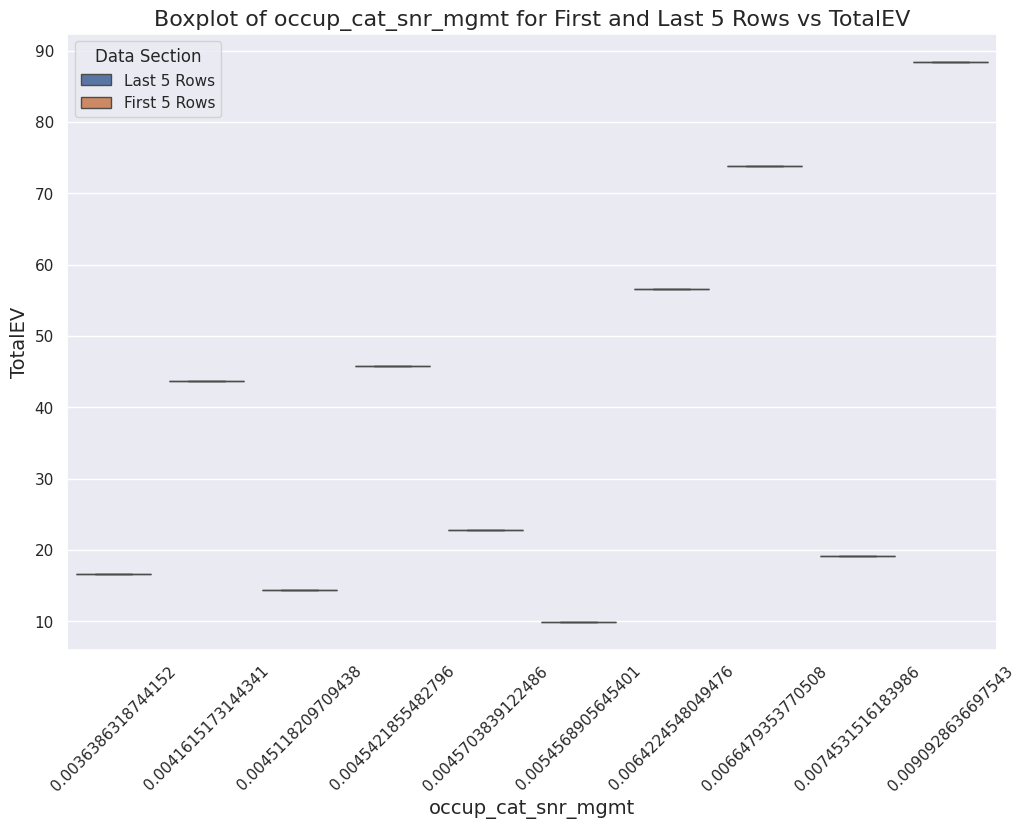

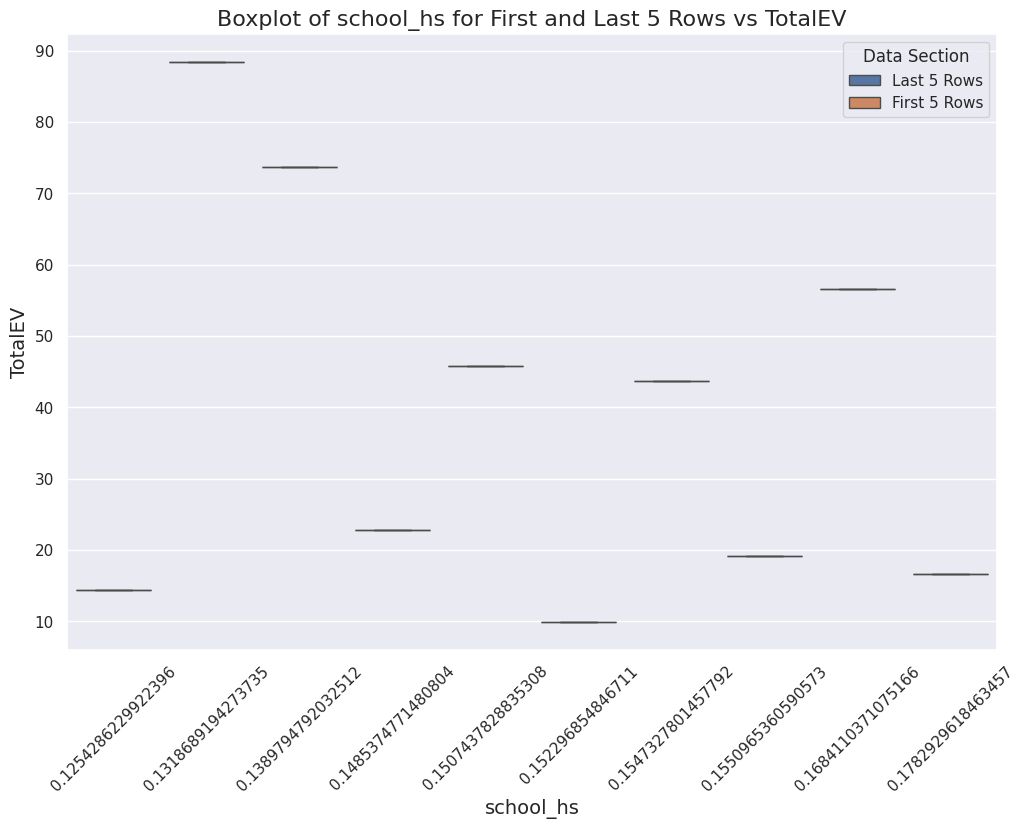

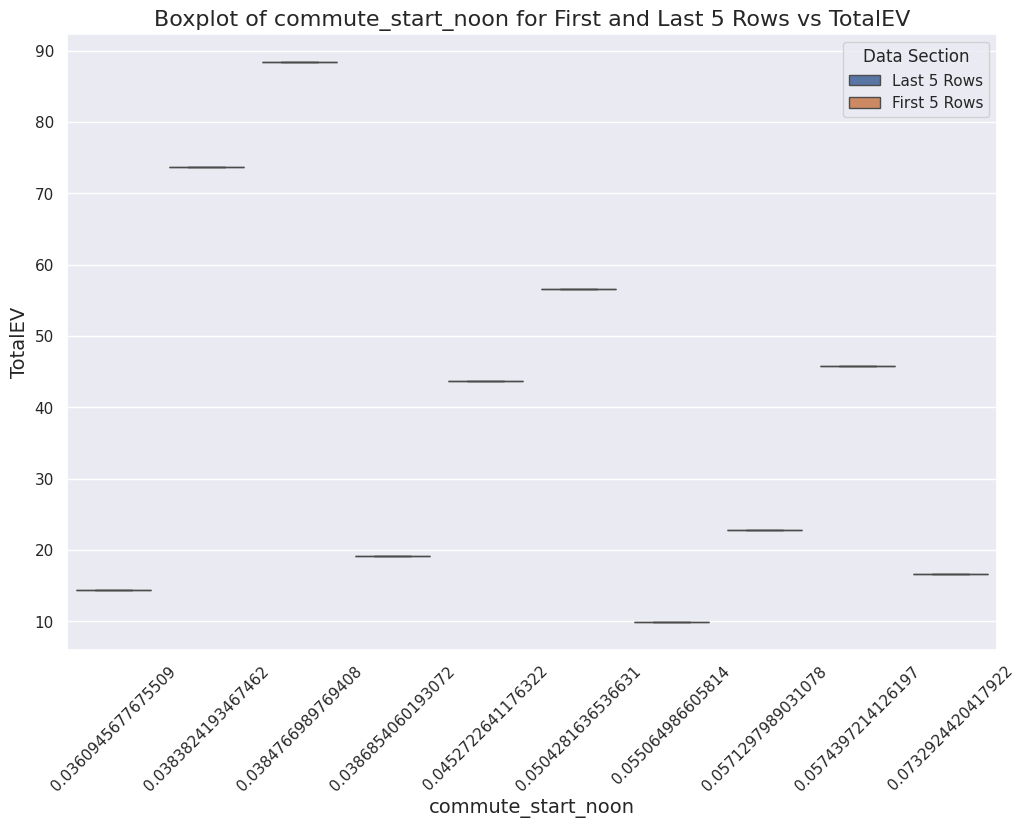

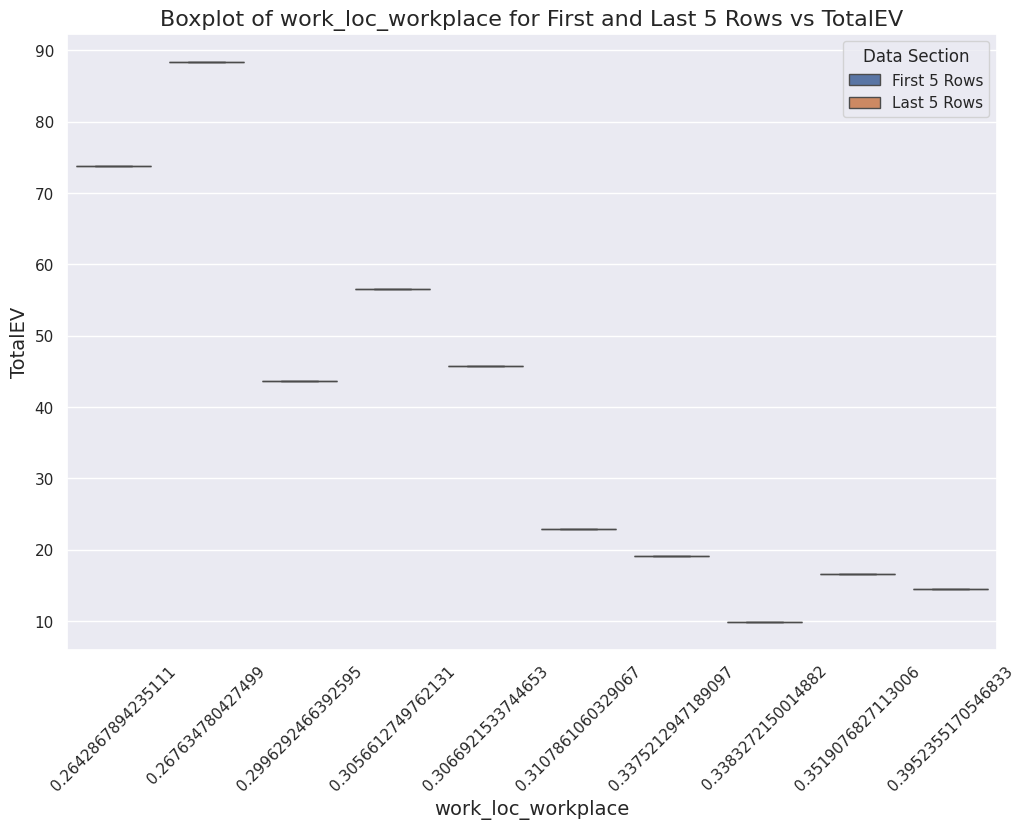

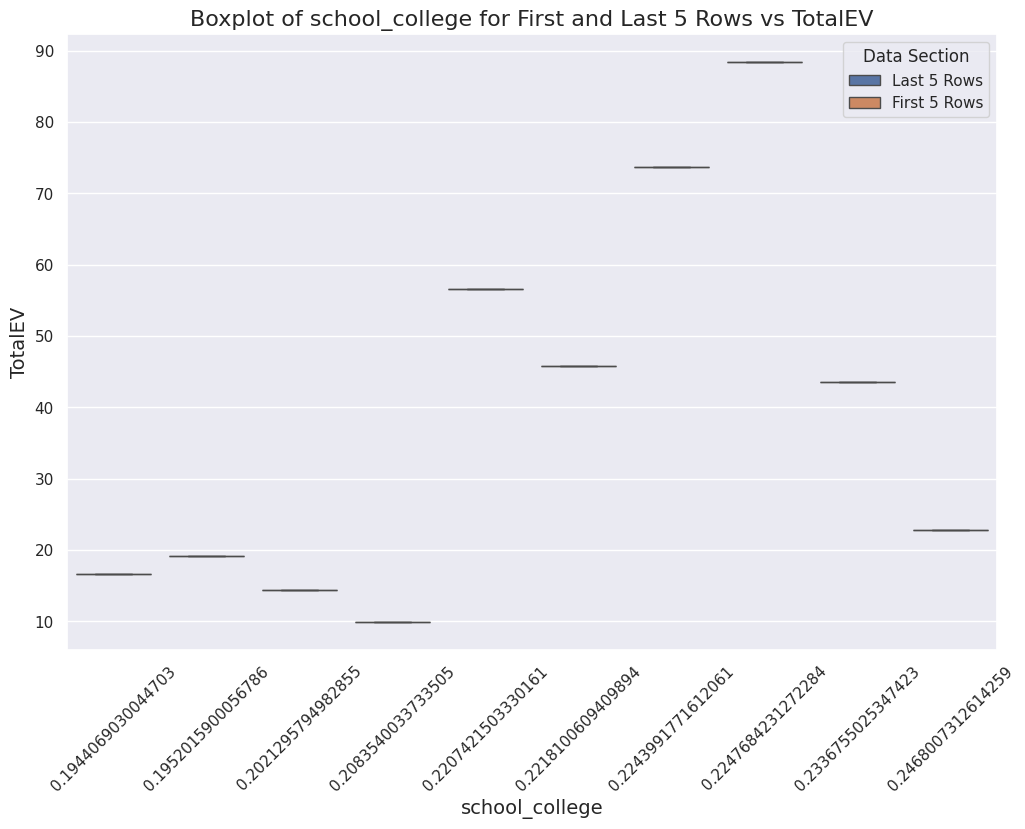

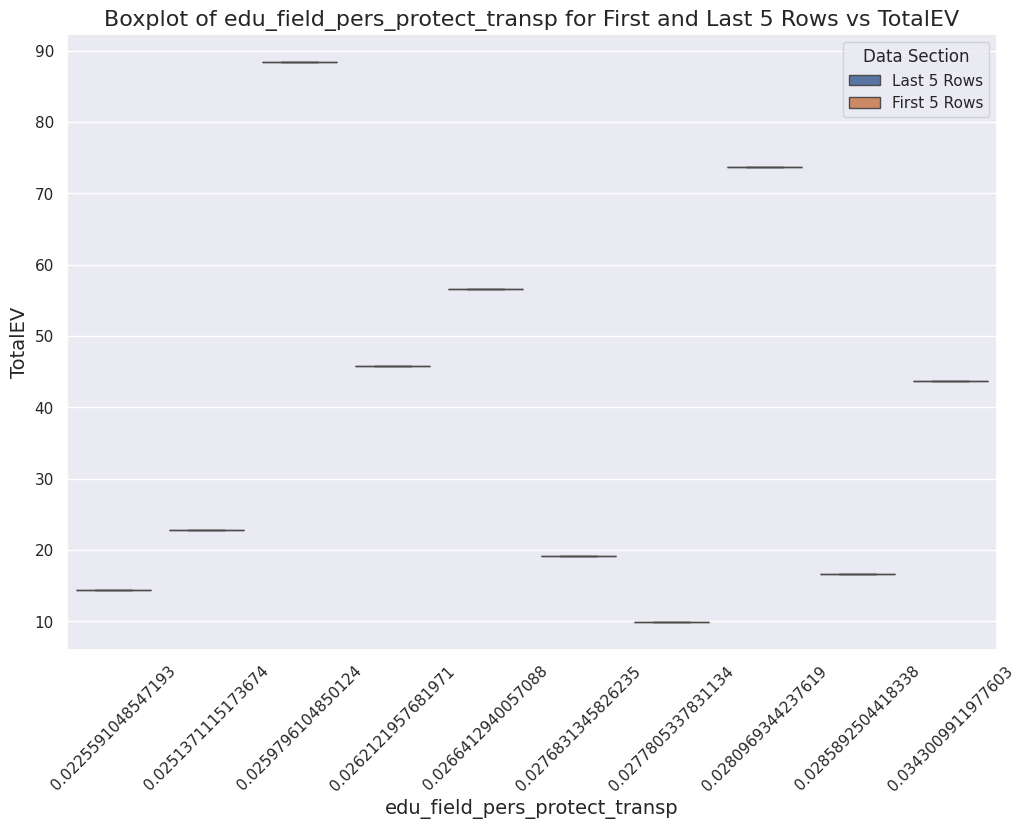

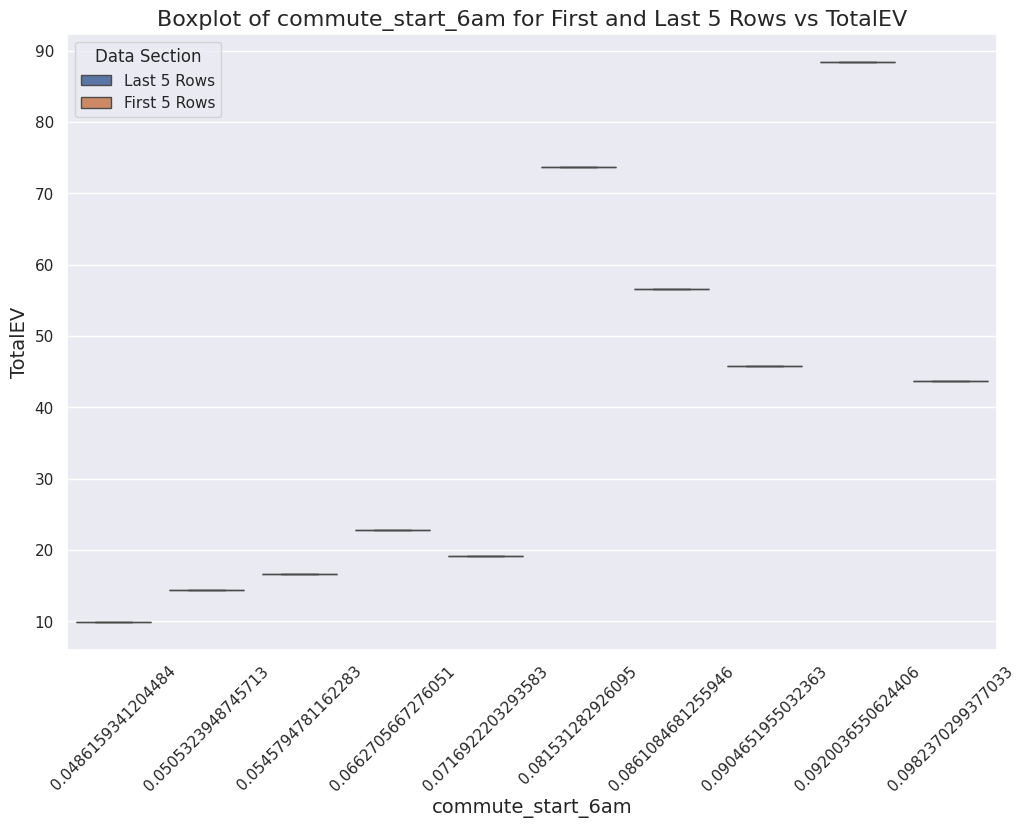

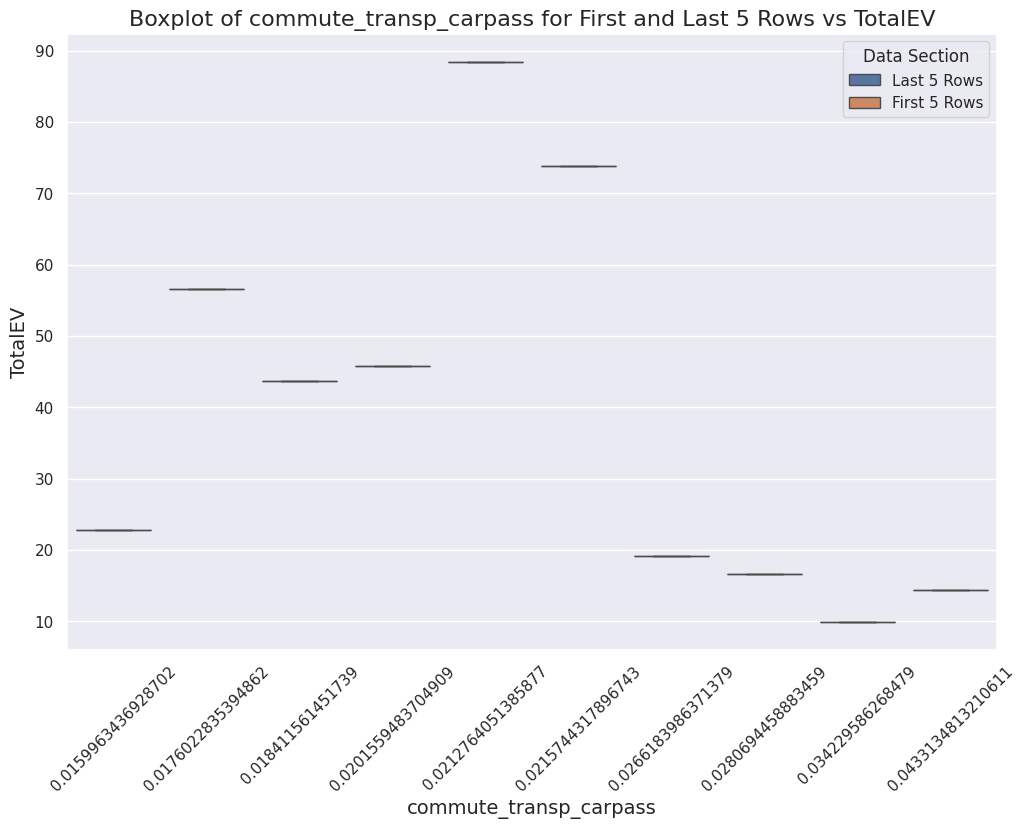

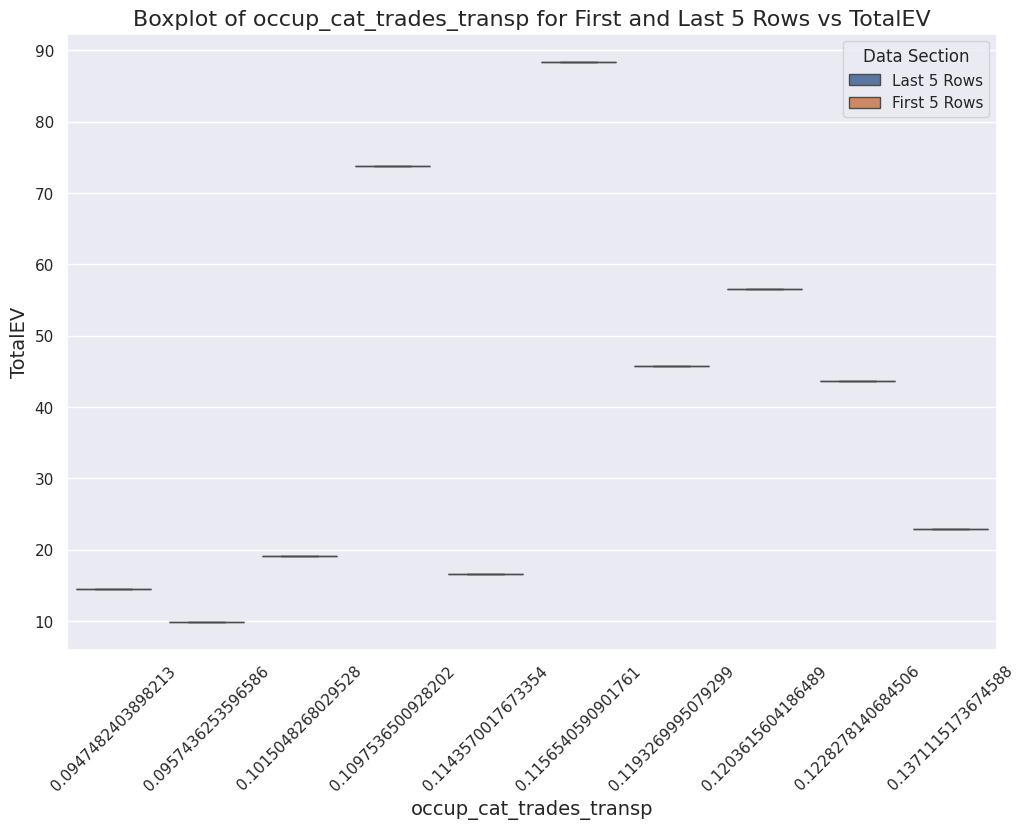

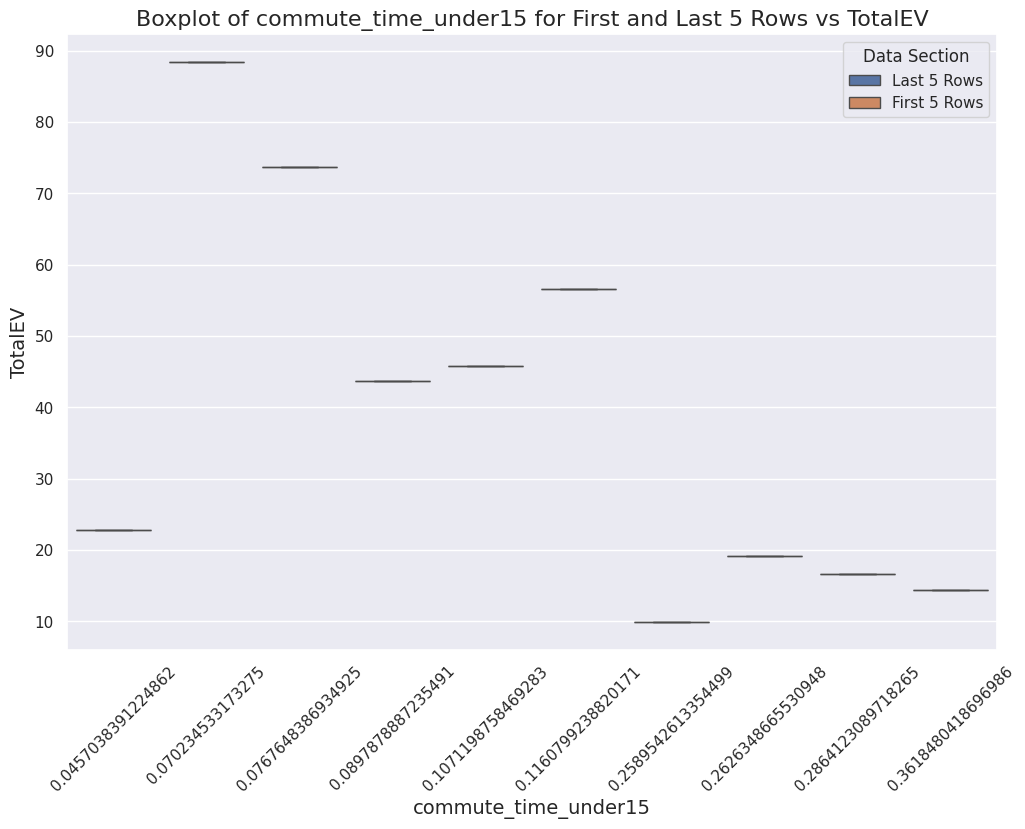

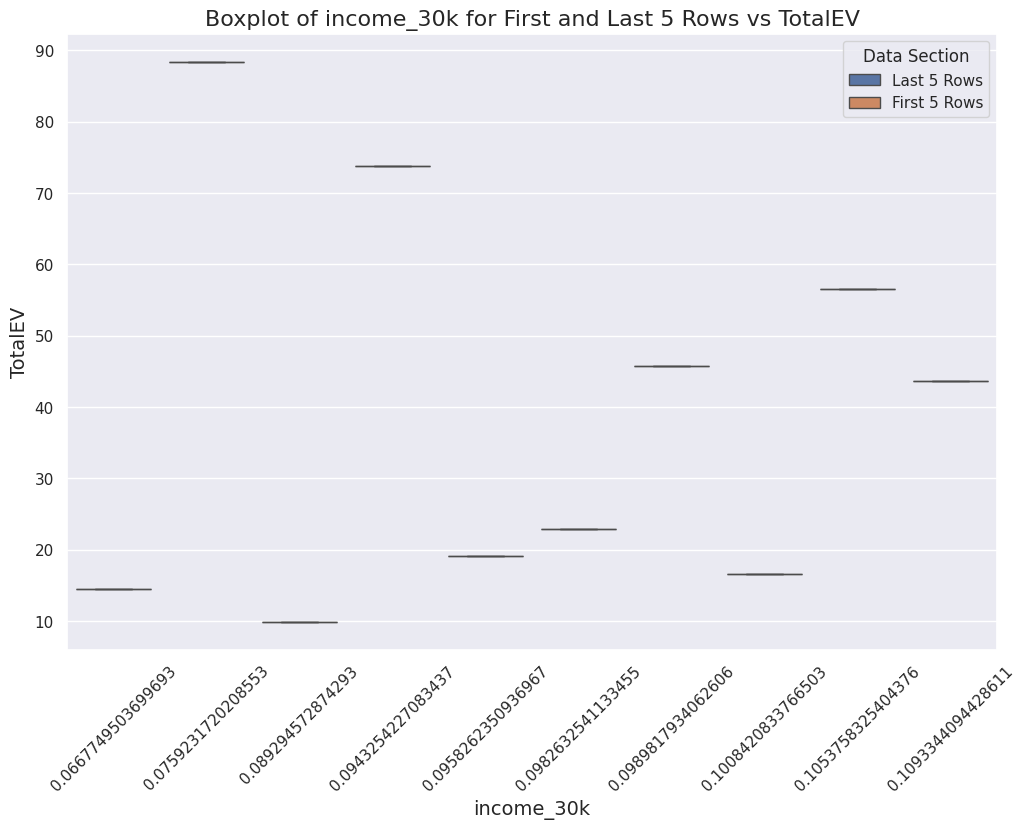

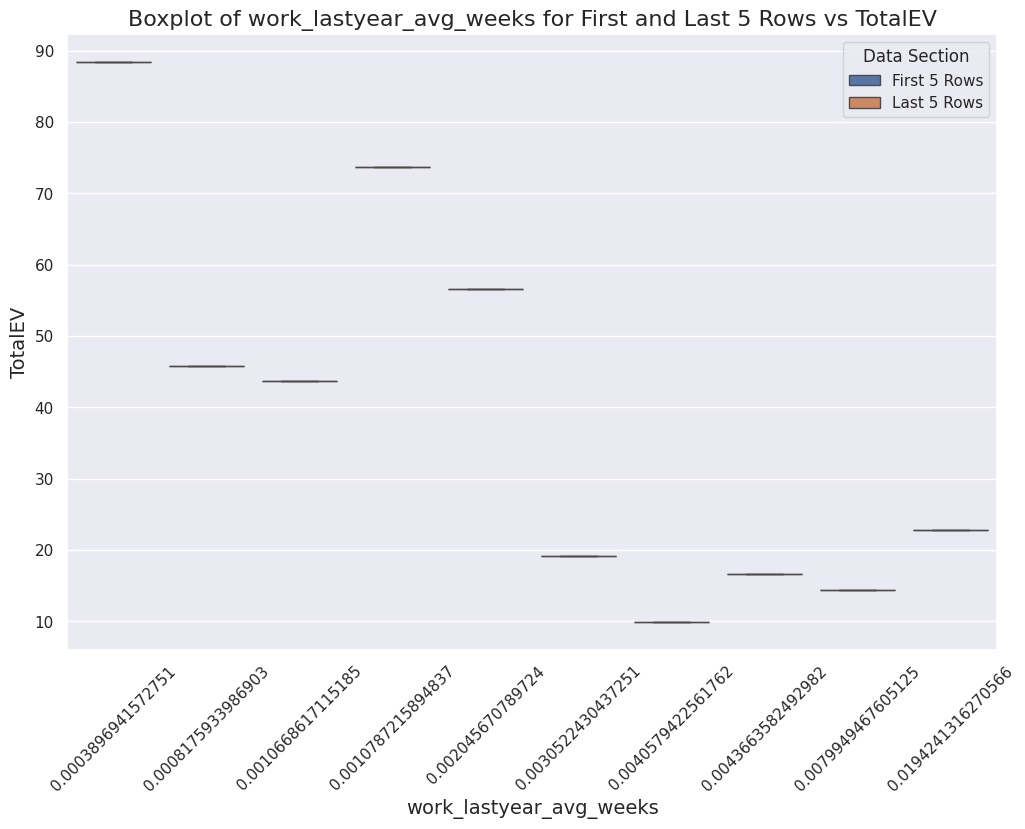

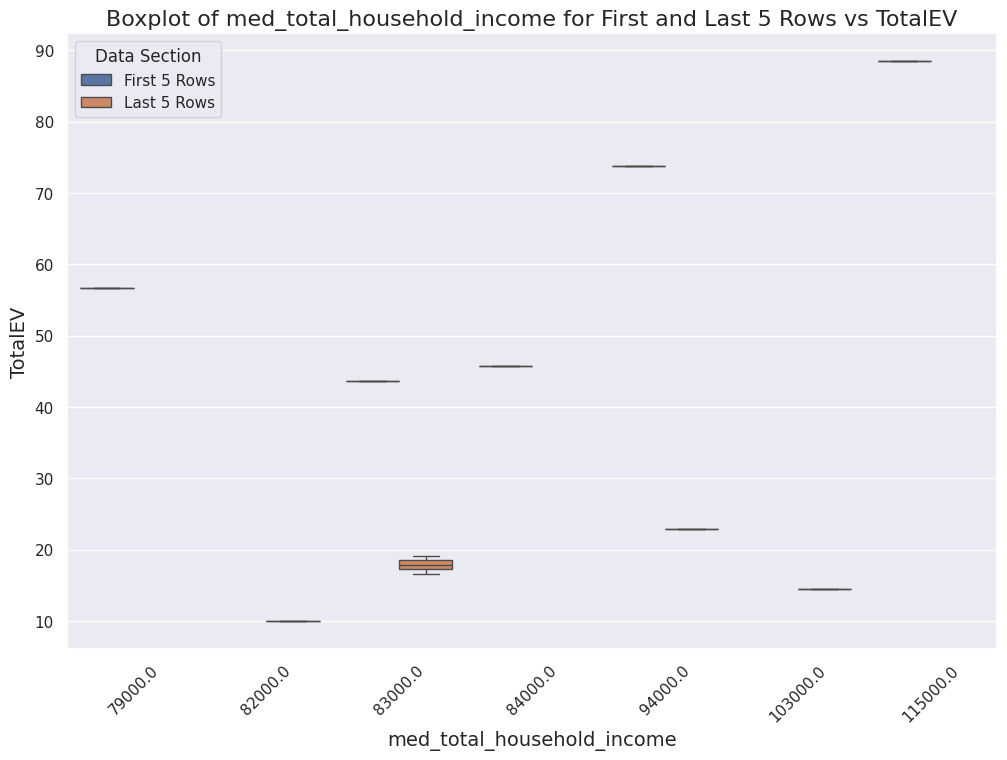

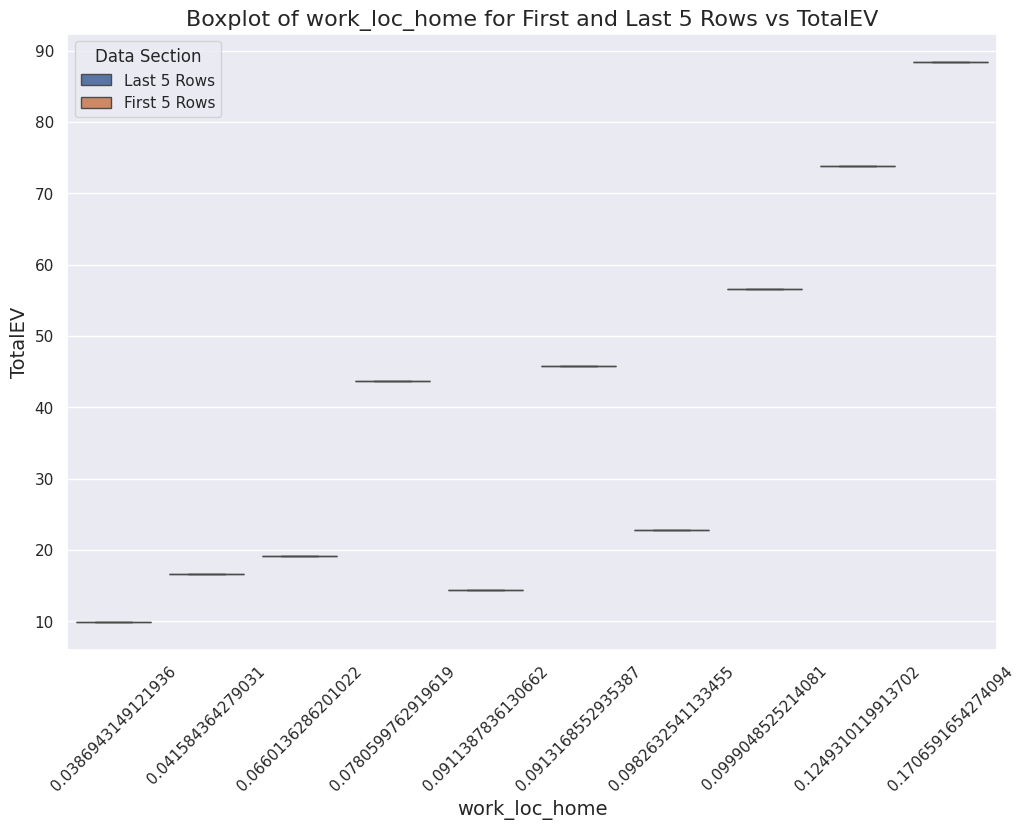

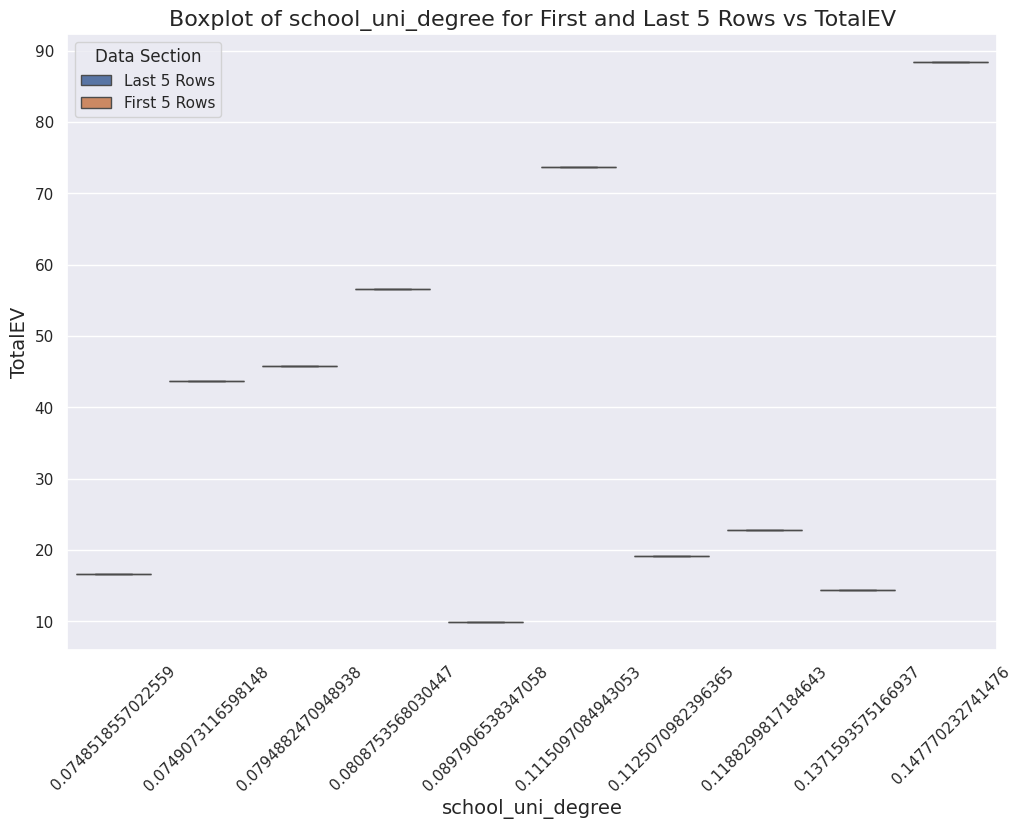

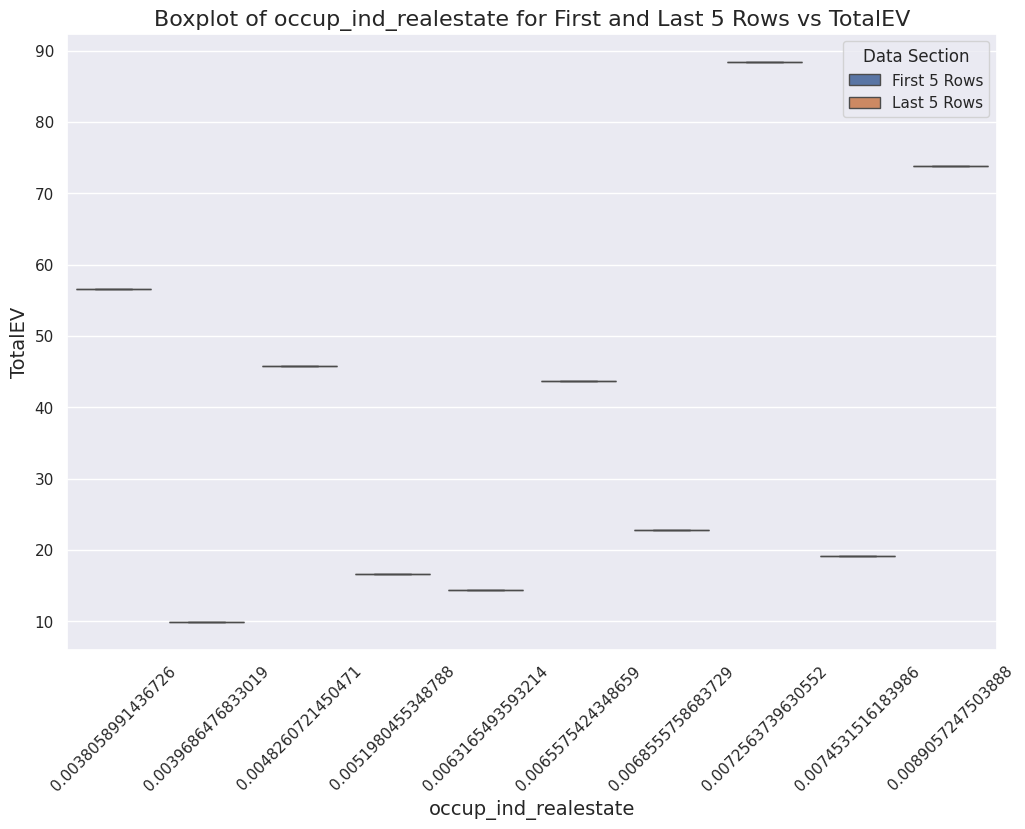

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'TotalEV' is not among these features and we're looking at other numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'TotalEV' in numerical_columns:
    numerical_columns.remove('TotalEV')  # Remove 'TotalEV'

# Extract the first 5 and last 5 rows
df_head = df.head(5)
df_tail = df.tail(5)

# Combine the extracted rows into a single dataframe for plotting
# Add an additional column to distinguish between the first and last parts
df_head['DataSection'] = 'First 5 Rows'
df_tail['DataSection'] = 'Last 5 Rows'
df_combined = pd.concat([df_head, df_tail])

# Now, plot the boxplots for each feature in df_combined against 'TotalEV'
for col in numerical_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(y='TotalEV', x=col, hue='DataSection', data=df_combined)
    plt.title(f'Boxplot of {col} for First and Last 5 Rows vs TotalEV', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('TotalEV', fontsize=14)
    plt.legend(title='Data Section')
    plt.xticks(rotation=45)
    plt.show()
